<a href="https://colab.research.google.com/github/nitish-m/EV-Market-Segmentation-Analysis/blob/main/EV_Market_Segmentation_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("/content/ElectricCarData_Clean.csv")
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


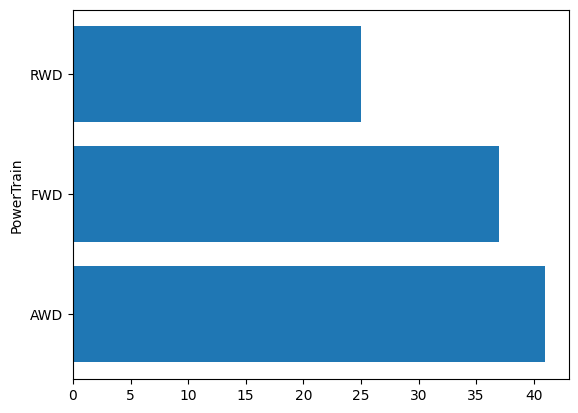

In [19]:
bars = df["PowerTrain"].value_counts()
plt.barh(bars.index, bars.values)
plt.ylabel('PowerTrain')
plt.show()

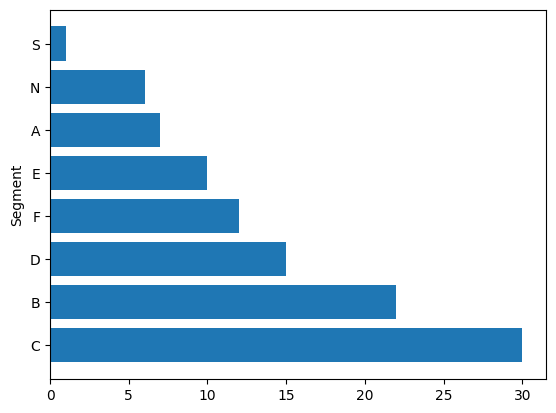

In [20]:
bars = df["Segment"].value_counts()
plt.barh(bars.index, bars.values)
plt.ylabel('Segment')
plt.show()

<Axes: xlabel='AccelSec', ylabel='TopSpeed_KmH'>

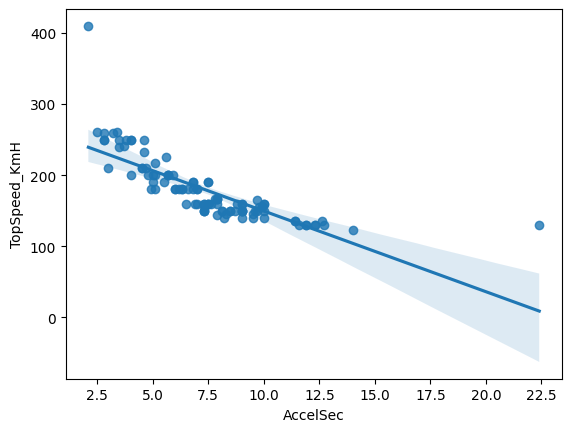

In [21]:
import seaborn as sns
x=df['AccelSec']
y=df['TopSpeed_KmH']
sns.regplot(x=x,y=y)

<Axes: xlabel='TopSpeed_KmH', ylabel='Range_Km'>

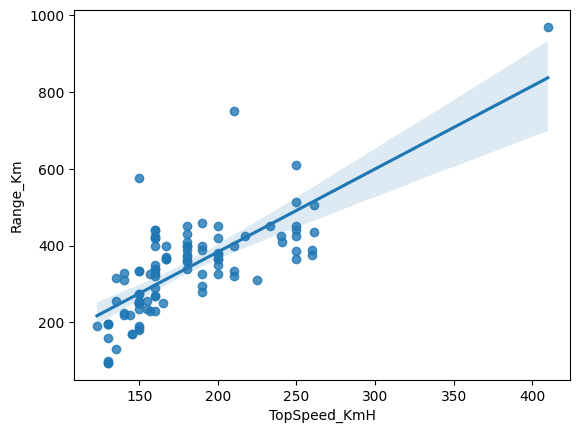

In [22]:
x=df['TopSpeed_KmH']
y=df['Range_Km']
sns.regplot(x=x,y=y)

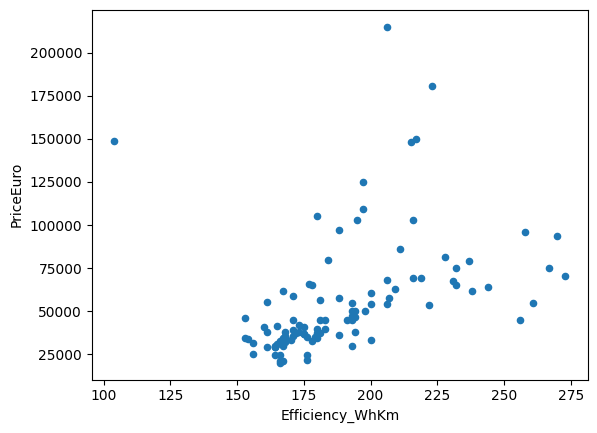

In [8]:
df.plot(kind='scatter',x='Efficiency_WhKm',y='PriceEuro')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

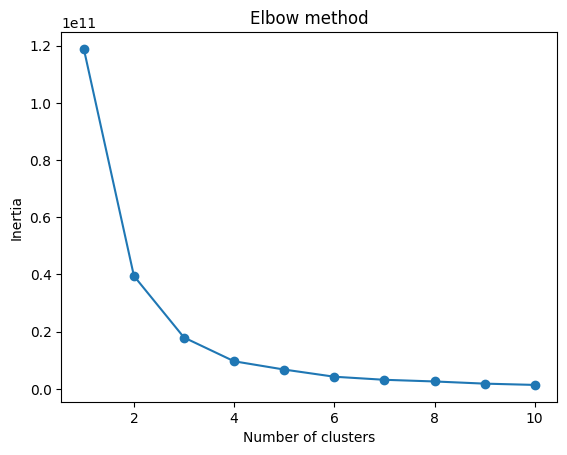

In [25]:
from sklearn.cluster import KMeans
x=df['Efficiency_WhKm']
y=df['PriceEuro']
data = list(zip(x, y))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


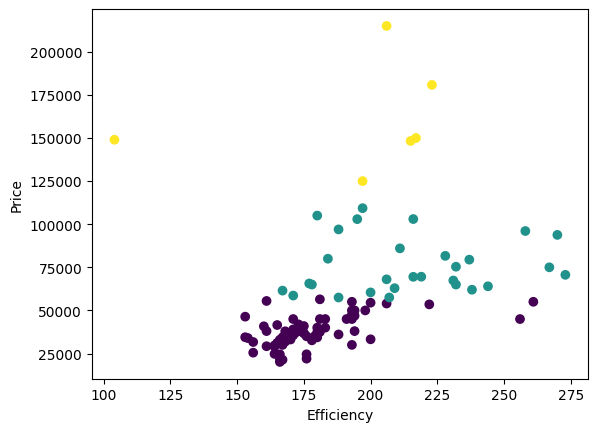

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.xlabel('Efficiency')
plt.ylabel('Price')
plt.show()